In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image

In [196]:
path = os.path.join("C:\\Users\\Robin\\Desktop\\deep_learning")
file = np.load(path+"\\processed_data\\v3_absolute_grape_changeling-12_2293-4124NDTRAIN.npy", allow_pickle=True)[1]
file = np.array(file[-1792:][:5]).astype(np.uint8)
processed = np.array([])
for i in range(len(file)):
    processed = np.append(np.array(Image.fromarray(file[i], "RGB").convert("L")), processed)
processed = processed.reshape(5, 64, 64)
print(processed[0].shape)
print(processed)
test = np.array([processed[-1]])
processed = processed[:4]


(64, 64)
[[[ 21.  18.  18. ...  22.  24. 179.]
  [ 22.  17.  29. ...  23. 177. 139.]
  [ 18.  25.  22. ... 179. 125. 111.]
  ...
  [ 22.   9.  28. ...  52.  58.  94.]
  [ 10.  11.  22. ...  56.  58.  76.]
  [ 18.  16.  15. ...  50.  58.  43.]]

 [[ 18.  23.  22. ...  29.  23.  19.]
  [ 25.  18.  23. ...  15.  17. 179.]
  [ 31.  26.  24. ...  18. 179.  30.]
  ...
  [ 40.  40.  39. ...  63.  65.  49.]
  [ 43.  42.  35. ...  64.  81. 104.]
  [ 40.  37.  57. ...  61.  81.  84.]]

 [[ 18.  12.  22. ...  16.  21.  16.]
  [ 19.  18.  25. ...  15.  18. 179.]
  [ 27.  26.  25. ...  18.  19.  29.]
  ...
  [ 53.  43.  40. ...  80. 103.  49.]
  [ 51.  40.  38. ...  80. 101. 106.]
  [ 43.  37.  31. ...  63.  46.  85.]]

 [[ 14.  15.  18. ...  23.  16.  23.]
  [ 47.  22.  16. ...  23.  23.  24.]
  [ 44.  15.  18. ...  29.  29.  25.]
  ...
  [ 44.  32.  71. ...  88. 110.  51.]
  [ 90.  73.  65. ...  70.  88. 110.]
  [ 74.  61.  65. ...  68.  88. 110.]]

 [[ 32.  32.  16. ...  23.  16.  23.]
  [ 47.  

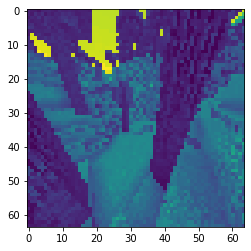

In [190]:
plt.imshow(processed[0])

In [202]:

en = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[64,64]),
    keras.layers.Dense(100, activation="tanh"),
    keras.layers.Dense(30, activation="tanh"),
])


de = keras.models.Sequential([
    keras.layers.Dense(100, activation="tanh", input_shape=[30]),
    keras.layers.Dense(64 * 64, activation="sigmoid"),
    keras.layers.Reshape([64,64])
])

en_de = keras.models.Sequential([en, de])
for layer in en.layers:
    print(layer.get_output_at(0).get_shape().as_list())
for layer in de.layers:
    print(layer.get_output_at(0).get_shape().as_list())

en_de.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.5))

history = en_de.fit(processed, processed, epochs=1, validation_data=(processed, processed))

en_de.summary()

[None, 4096]
[None, 100]
[None, 30]
[None, 100]
[None, 4096]
[None, 64, 64]
1/1 [==============================] - 1s 665ms/step - loss: 0.6729 - val_loss: -12.5678
Model: "sequential_372"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_370 (Sequential)  (None, 30)                412730    
_________________________________________________________________
sequential_371 (Sequential)  (None, 64, 64)            416796    
Total params: 829,526
Trainable params: 829,526
Non-trainable params: 0
_________________________________________________________________


Original image:


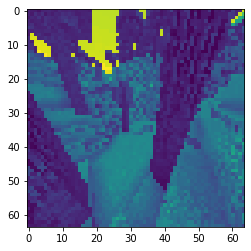

AI vision:


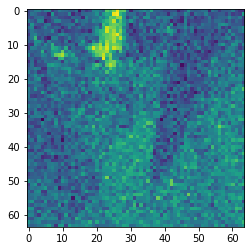

In [206]:
image = en_de.predict([test])
#Original image
print("Original image:")
plt.imshow(processed[0])
plt.show()
#AI autoencoder vision
print("AI vision:")
plt.imshow(image.reshape(64,64))
plt.show()